### Tikets de falla de ETECSA Mayabeque

Aquí se analizarán los tikets de falla de etecsa y se verá cómo a partir de los tipos de tikets podemos llegar a una predicción del tiempo que demorará en solucionarse.


#### Descripción de los Datos.
Los datos han sido probistos por el centro de etecsa de mayabeque, son los resultados de los tikets de falla de 2022 y 2023 en todo el municipio. tenemos una muestra de 1448 tikets de falla repartidos entre los siguientes tipos:  
.Fallo por Software: SW  
.Fallo por Hadware:HW  
.Fallo por Cable o Conectores:C  
.Fallo por Corriente Alterna:AC
.Fallo por Corriente Directa:DC  
.Fallo Provocado por el Cliente:PC  
.Fallo por Falta de Mantenimientos:MTTO  
.Fallo por Alto nivel de Tráfico:AT  
.Desaparecido:D  
.Fallo por pruebas:P  
.Baja Técnica:BT

#### Aquí voy a describir qué significa cada fallo:


In [3]:
import pandas as pd

# Cargar los datos, y mostrar los datos que yo usaré
data = pd.read_csv('Tickets.csv')
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT','Tg (min)']])
print(data.describe())

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
                SW           HW            C           AC           DC  \
count  1448.000000  1448.000000  1448.000000  1448.000000  1448.000000   
mean      0.118094     0.102210     0.013122     0.620856     0.017265   
std       0.322831     0.303029     0.113835     0.48534

Las variables binarias 'SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT'  no son aptas para un análisis estadístico tradicional.  Debido a su naturaleza binaria, solo pueden tomar dos valores, lo que limita las posibilidades de análisis de tendencia, distribución o correlación. Sin embargo el análisis de los tiempos de resolución de los tickets,  medidos en minutos (Tg(min)) revela información interesante:  
- Los tickets demoran un promedio de 22204.52 minutos sugiere que, en promedio, los tickets tardan alrededor de 15 dias en resolverse.  
- La desviación estándar de 83676.57 minutos,alrededor de 58 días, indica una gran variabilidad en los tiempos de resolución, lo que puede ser un signo de outliers o una distribución sesgada. Esto indica que sacar conclusiones utilizando el promedio puede derivar en una interpretación erronea de los datos.  
- Pero podemos ver que el 75% de los tikets de falla se demoran en resolverse en 1697.50 minutos, alrededor de 28 horas. Es un cambio significativo con el promedio visto de antes.   
  

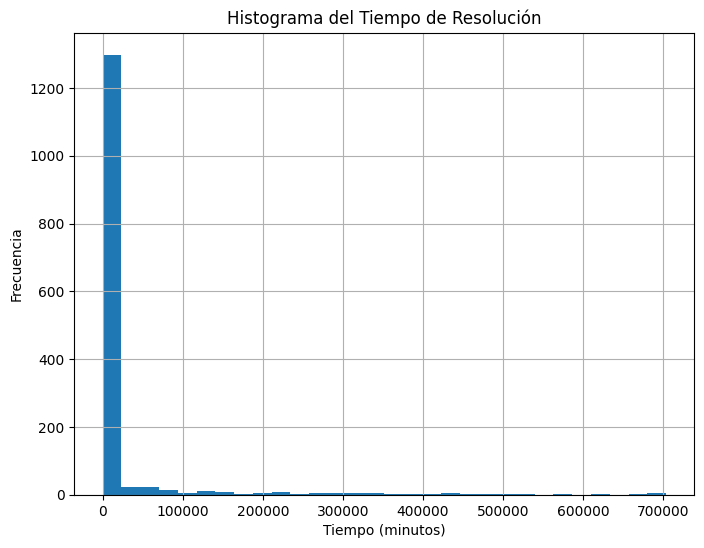

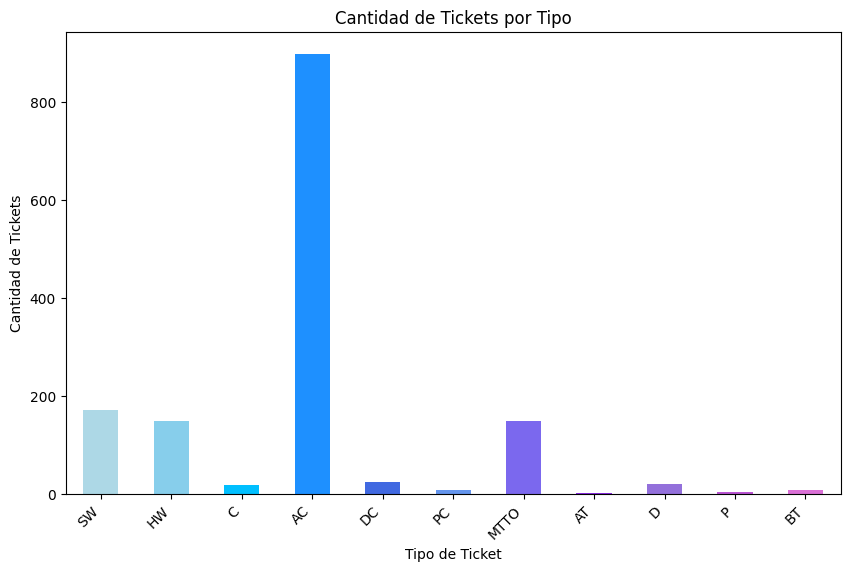

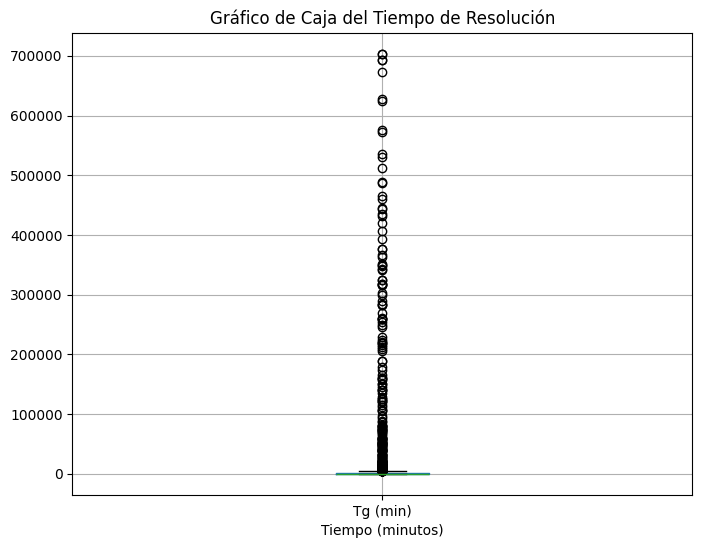

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('Tickets.csv')

# Crear los gráficos

## Histograma del tiempo de resolución
plt.figure(figsize=(8, 6))
data['Tg (min)'].hist(bins=30)
plt.title('Histograma del Tiempo de Resolución')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico de barras de tipos de tickets
plt.figure(figsize=(10, 6))
data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']].sum().plot(kind='bar', color=['#ADD8E6', '#87CEEB', '#00BFFF', '#1E90FF', '#4169E1', '#6495ED', '#7B68EE', '#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6'])
plt.title('Cantidad de Tickets por Tipo')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

## Gráfico de caja del tiempo de resolución
plt.figure(figsize=(8, 6))  
data.boxplot(column=['Tg (min)'])
plt.title('Gráfico de Caja del Tiempo de Resolución')
plt.xlabel('Tiempo (minutos)')
plt.show()


Acá en estos graficos podemos ver una representación visual de lo que se explicaba ahotita. El primero muestra como se distribuyen los 1448 tikets en intervalos de tiempos de solución, y de esos vemos que 1200 entán bien por de bajpo de los 10000 minutos, por debajo de 6 dias de demora de solución. Y en el grafico de caja podemos ver la gran cantidad de ellos que están por ensima, son cerca de otros 200 tikets los que se situarían por esa zona. haciendo análisis de datos podemos llegar a otros factores, por ejemplo: el siguiente gráfico mostrará el tiempo promedio de cada tiket 

C:\Users\Amalia\AppData\Local\Temp\ipykernel_2896\1263450377.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


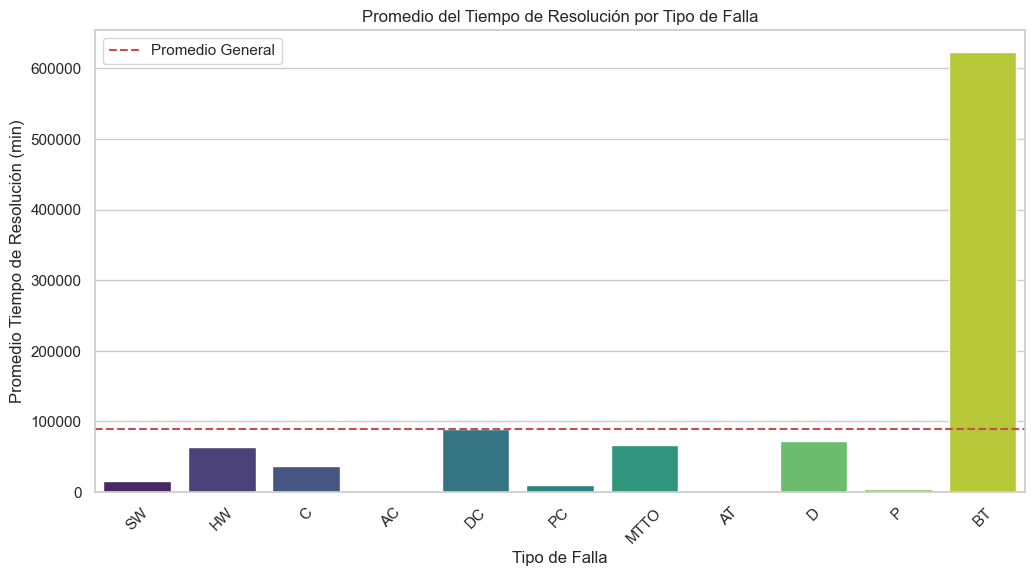

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()

Como podemos ver tenos una distribución acorde con los análisis anteriores, la mayoría de los tipos de fallas se encuentran por debajo de los 6 días de demora en su restauración, pero vemos algo interesante, los fallos de AC (Fallo por Corriente alterna) son fallos que no demoran mucho en resolverse, sin embargo, son un tipo de fallo que ha mostrado una frecuencia superior a 800 apariciones en menos de 2 años.además esta falla no es responsabilidad de Etecsa, dado que son por falta de energía o deficit de capacidad de la empresa eléctrica que su falta interrumpe los servivicios de comunicación por el momento de su salida. Si analizamos el tiempo de solución de lo tikets de etecsa por los análisis que hemos visto estamos haciendo un calculo pocopresiso, poque hay una variable fuertemente almacenada en un tiempo de solución que no es el que conocemos. sierto es que estamos convergiendo a un análisis presiso, per aquí queremos entrar en el objetivo del trabajo:  
##### Se podrá mejorar la eficiencia de la resolución de los tikets de falla?  
Bueno antes de responder esto habrá que entender algo, para mejorar la eficiencia de algo hay que pasar por varios descubrimientos, se desea eficiencia después de conocer un patrón a ineficiencia. En una empresa de telecomunicaciones la eficiencia la da la comunicación acticva, constante y rápida, la falta de esos factores los da los tikets de falla, y estos tikets han mostrado ser de varios tipos, con mayor frecuencia los AC pero no son responsabilidad de Etecsa aunque afecte sus servicios, la ineficienca por AC a pesar de que en los resultados estadísticos comprometa los valores del promedio, la media, la moda o la varianza estandar, no son objetivo a superar. sin embargo hemos visto que las bajas temporales han mostrado ser un factor pico al tiempo de solución, pero no ha mostrado ser un error muy frecuente. Aún así npo hemos llegado a conclusiones que nos ayude a rebelar una solución al tiempo de solución de las fallas, hemos encontrado frecuencia, tiempo, promedio, desviación estandar y aunque hayan sido de suma importancia para nuestro análisis ha quedado con la necesidad de un estudio más profundo.  
   
   Con este trabajo queremos predecir según el tipo de falla nuevo saliente, cuanto tiempo demorará en resolverse con el objetivo de el personal cualificado detecte la ineficiencia donde se encuentra y sepan acudir mejorando los patrones de demora en trabajos de soluciones de falla. este estudio debería tener en cuenta el resultado que acabamos de ver antes, no todos los tipos de falla tienen el mismo peso. Así lo veíamos cuando salía el fallo de AC que gran cantidad de estos, sin embargo no duraban mucho, pero sí afectaban a los cálculos estadísticos. Tabien lo veíamos con las bajas temporales, en ete caso no fueron muchas, pero de ellas las que fueron demoraron una cantidad increíble en solucionarse y el servicio por ellas fue interrumpido por largo tiempo, esto también afectó los resultados estadísticos simples. Ahora queremos tener todos estos factores en cuenta, queremos llevar un análisis con un equilibrio matemático presiso, algo que nos ayude a analixar como todas estas variables afectan en el tiempo, queremos predecir el tiempo de solución de los próximos tikets de falla pero queremos tener en cuenta la presición y la importancia correcta poara cada una de ellas, tomando cada variable como un campo donde cuando ella sea la marcada se analice la viabilidad de la predicción según sus resultados anteriores, donde cada nuevo tiket no sea afectado en predicción por aquellos casos atípicos que afectaron mucho los resultados.  
     
     Pensando en esto creemos que sí sea posible, en la asignatura de matemática numérica estudiamos un método numérico que se llama Regresión lineal:
     Gran significado de la regresión lineal seguido del estilo del párrafo anterior

Como podemos ver tenos una distribución acorde con los análisis anteriores. El análisis de los datos de falla muestra que la mayoría de los tickets se resuelven en menos de 6 días. Sin embargo,  las fallas por Corriente Alterna (AC) son particularmente interesantes. A pesar de tener un tiempo de resolución relativamente corto, las fallas AC representan un alto porcentaje de los tickets, con más de 800 casos en menos de dos años.  Es importante destacar que las fallas AC no son responsabilidad de Etecsa, sino que se deben a interrupciones en el suministro eléctrico.  
  
Aunque la mayoría de los tickets se resuelven rápidamente, el gráfico anteror revela una variable importante que afecta el tiempo de solución.  Las bajas temporales (BT), aunque no tan frecuentes, suelen demorarse un tiempo considerable en resolverse, lo que afecta significativamente el promedio de tiempo de solución.  
  
El objetivo de este estudio es desarrollar un modelo predictivo que permita determinar el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta la naturaleza específica de la falla. Este modelo debe ser preciso y considerar la importancia relativa de cada variable para lograr una predicción confiable.  
    
  Si bien la alta variabilidad y posibles outliers en los tiempos de resolución de los tickets  requieren un análisis más profundo, podemos comenzar a comprender mejor este comportamiento  utilizando herramientas de la matemática numérica. Un enfoque prometedor podría ser la aplicación de **Regresión lineal**,  la cual nos permite  identificar relaciones  entre las variables  y predecir los tiempos de resolución.  Este enfoque nos permitirá  extraer información significativa de los datos y  ayudarnos  a tomar mejores decisiones  para optimizar la gestión de  los tickets.   
  
Esta técnica matemática permite modelar la relación entre las variables independientes (en este caso los tipos de falla) y la variable dependiente (tiempo de solución).  La regresión lineal nos permitirá:
  
* **Identificar los factores que más influyen en el tiempo de solución:**  Analizando los coeficientes de la regresión, podremos determinar qué variables tienen un mayor impacto en el tiempo de solución.  
* **Predecir el tiempo de solución:**  Utilizando los coeficientes de la regresión, podremos construir un modelo que permita predecir el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta las variables específicas de cada caso.  
* **Optimizar la resolución de fallas:**  Al comprender la relación entre las variables y el tiempo de solución, podemos tomar medidas para optimizar el proceso de resolución de fallas, priorizando las fallas con mayor impacto en los servicios y  reduciendo el tiempo de respuesta para las fallas de mayor duración.  

### Modelo re regresión lineal

In [7]:
import numpy as np
import pandas as pd

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT','Tg (min)']])


# Creando la matriz
# Seleccionar las columnas para X (variables independientes) 
X_columns = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
X = data[X_columns].values  # Convertir a un array de NumPy

# Agregar una columna de unos para el intercepto b_0
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Seleccionar la columna para Y (variable dependiente)
Y = data['Tg (min)'].values  # Convertir a un array de NumPy

print("Matriz X:")
print(X)

print("\nVector Y:")
print(Y)


# Calcular los coeficientes β
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

print("Coeficientes β:")
print(beta)

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
Matriz X:
[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]

Vector Y:
[ 14111  14552  26101 ... 121984   1379   3917]
Coeficientes β:
[-65536.      0.  98304.  32768.  327